In [64]:
import xarray as xr
import rasterio
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.cm import YlOrBr, PuRd, YlGnBu
import matplotlib.colors as colors

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f

#### PLOT COLOR SCHEMES

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [77]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
figsize=(6.4*1, 4.8*1)

## METHODS

### Raster Alignment Section - Example Microwave vs. Optical

In [9]:
opt_path = r"../Data/optical-rs/2019-07-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

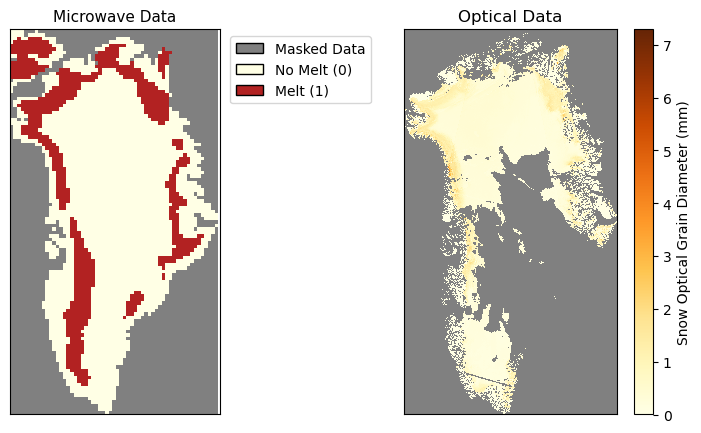

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(9.5,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data')
# set title font size
axs[0].title.set_size(11)

# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
# Iterate through the handles and call `set_edgecolor` on each
for ha in legend_handles:
    ha.set_edgecolor("black")

axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.75,1))


# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs)
axs[1].set_title('Optical Data')



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


plt.show()

### Data Quality Check: Dotted and Striped Optical Data

In [75]:
dotted_path = r"../Data/optical-rs/2019-05-25_grain_diameter.tif"
striped_path = r"../Data/optical-rs/2017-08-01_grain_diameter.tif"

dotted_data = xr.open_dataarray(dotted_path)
striped_data = xr.open_dataarray(striped_path)

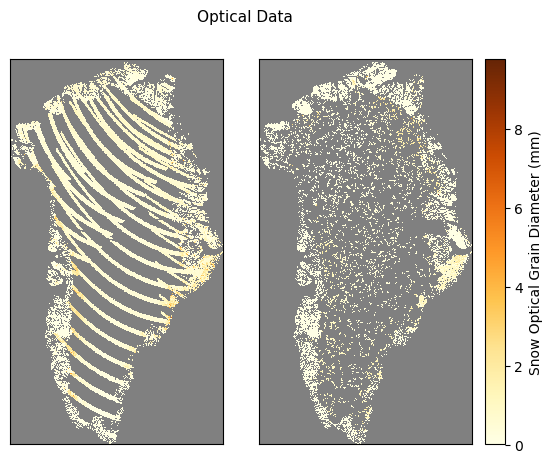

In [120]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(7,5))



dotted_im = dotted_data.plot(ax=axs[0], cmap=cmap, add_colorbar=False)
axs[0].set_title('')


# Plot the continuous data
striped_im = striped_data.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs, add_colorbar=True)
axs[1].set_title('')

# Adjust the aspect ratio of both subplots to be equal
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Hide the x-axis and y-axis labels for both subplots
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


fig.suptitle('Optical Data', fontsize=11)
plt.subplots_adjust(wspace=0.03)
# reduce the space between plots and title without changing the figure size and vertical space
plt.show()

## RESULTS

In [4]:
date = "2019-08-14"
path = r"D:/MasterThesis/Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=False)
data = f.data_normalization(data)
data.head()

100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


,x,y,mw_value,opt_value,col,row,mean_3,mean_9,sum_5,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight,elevation_data,slope_data,aspect_data,distance_to_margin
7,0.566051,0.993989,0.0,0.006382,827,16,0.0,0.0,0.0,0.0,0.0,1.0,0.074174,0.129044,0.841809,0.044088
68,0.534565,0.972201,0.0,0.000203,781,74,0.0,0.0,0.0,0.0,0.0,1.0,0.088251,0.013730,0.847711,0.116960
69,0.535250,0.972201,0.0,0.000318,782,74,0.0,0.0,0.0,0.0,0.0,1.0,0.080671,0.032565,0.924820,0.118053
70,0.538672,0.972201,0.0,0.000719,787,74,0.0,0.0,0.0,0.0,0.0,1.0,0.087439,0.085883,0.991787,0.123850
71,0.539357,0.972201,0.0,0.000908,788,74,0.0,0.0,0.0,0.0,0.0,1.0,0.077964,0.065382,0.965729,0.125073


### Prediction Plots

In [25]:
lr = f.load_object("LinearRegression")

data_predicted = f.mean_predict(lr, data)
f.save_prediction_tif(data_predicted, "mean", "../Data/results/LR_2019-08-14_meanPred.tif")

100%|██████████| 871181/871181 [00:54<00:00, 15880.19it/s]


In [20]:
path = r"../Data/results/LR_2019-08-14_meanPred.tif"
data_tif = xr.open_dataarray(path)

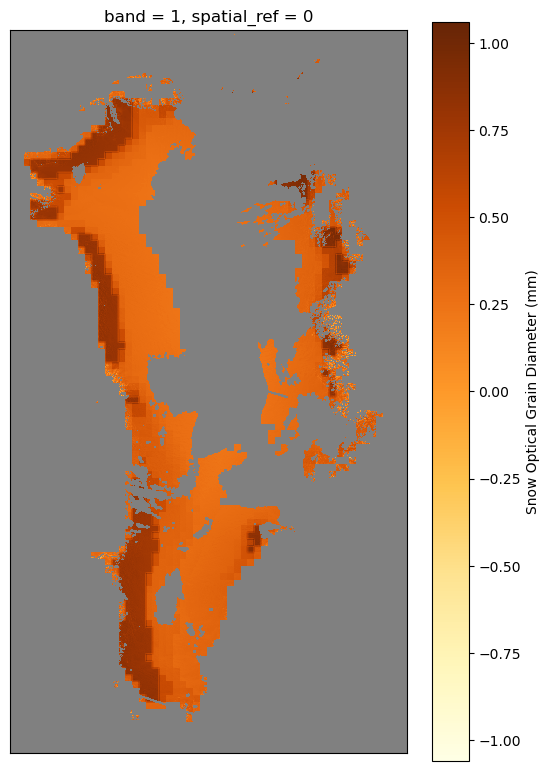

In [21]:
data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, figsize=(6.4, 4.8*2))

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

### STD PLOTS

In [ ]:
lr = f.load_object("LinearRegression")

data_predicted = f.mean_predict(lr, data)
f.save_prediction_tif(data_predicted, "std", "../Data/results/LR_2019-08-14_std.tif")

In [31]:
path = r"../Data/results/LR_2019-08-14_std.tif"
data_tif = xr.open_dataarray(path)

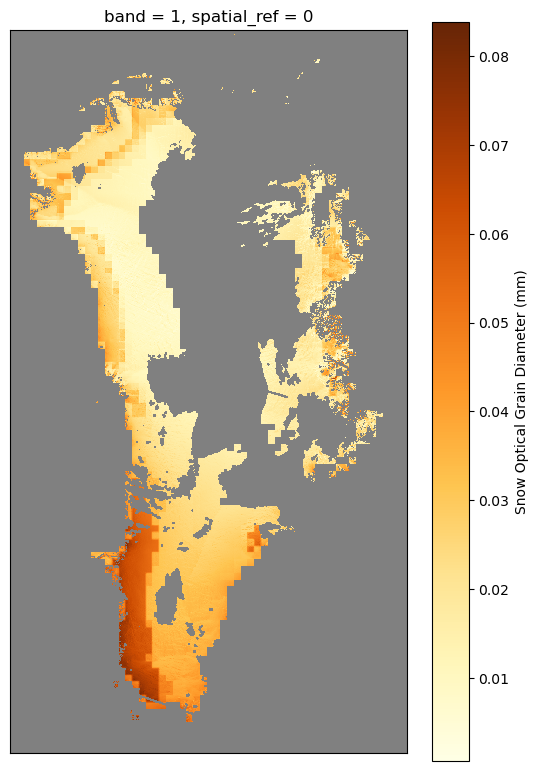

In [32]:
data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, figsize=(6.4, 4.8*2))

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

### ERROR PLOTS

In [33]:
lr = f.load_object("LinearRegression")

data_predicted = f.mean_predict(lr, data)
f.save_prediction_tif(data_predicted, "error", "../Data/results/LR_2019-08-14_error.tif")

100%|██████████| 871181/871181 [00:55<00:00, 15633.49it/s]


In [34]:
path = r"../Data/results/LR_2019-08-14_error.tif"
data_tif = xr.open_dataarray(path)

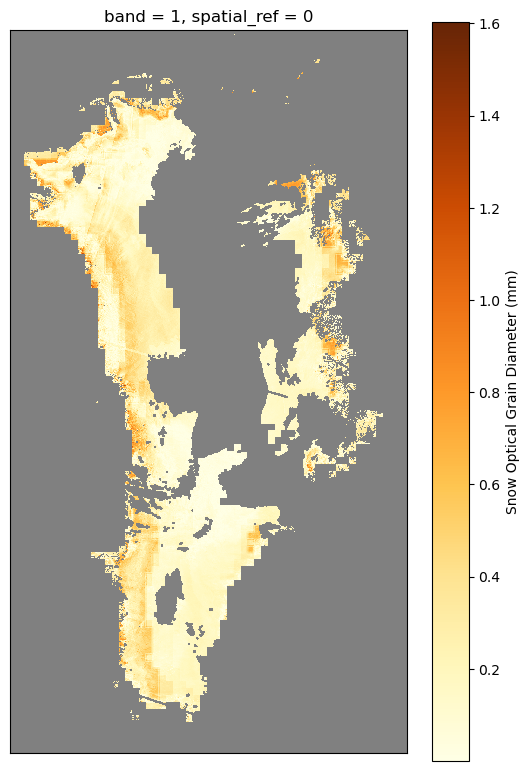

In [35]:
data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, figsize=(6.4, 4.8*2))

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)


### MEAN PRED, STD, ERROR GRID

**ONLY RUN THIS CELL IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE**

In [ ]:
# ONLY RUN IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE

for idx1, model_name in enumerate(["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]):
    model = f.load_object(model_name)
    data_predicted = f.mean_predict(model, data)

    for metric in ["mean", "std", "error"]:
        print(model_name, metric)
        f.save_prediction_tif(data_predicted, metric, f"../Data/results/{model_name}_2019-08-14_{metric}.tif")
    print()

In [71]:
xr.open_dataarray(f"../Data/results/LinearRegression_2019-08-14_mean.tif").min()

<xarray.DataArray 'band_data' ()>
array(-0.30933693, dtype=float32)
Coordinates:
    spatial_ref  int32 ...

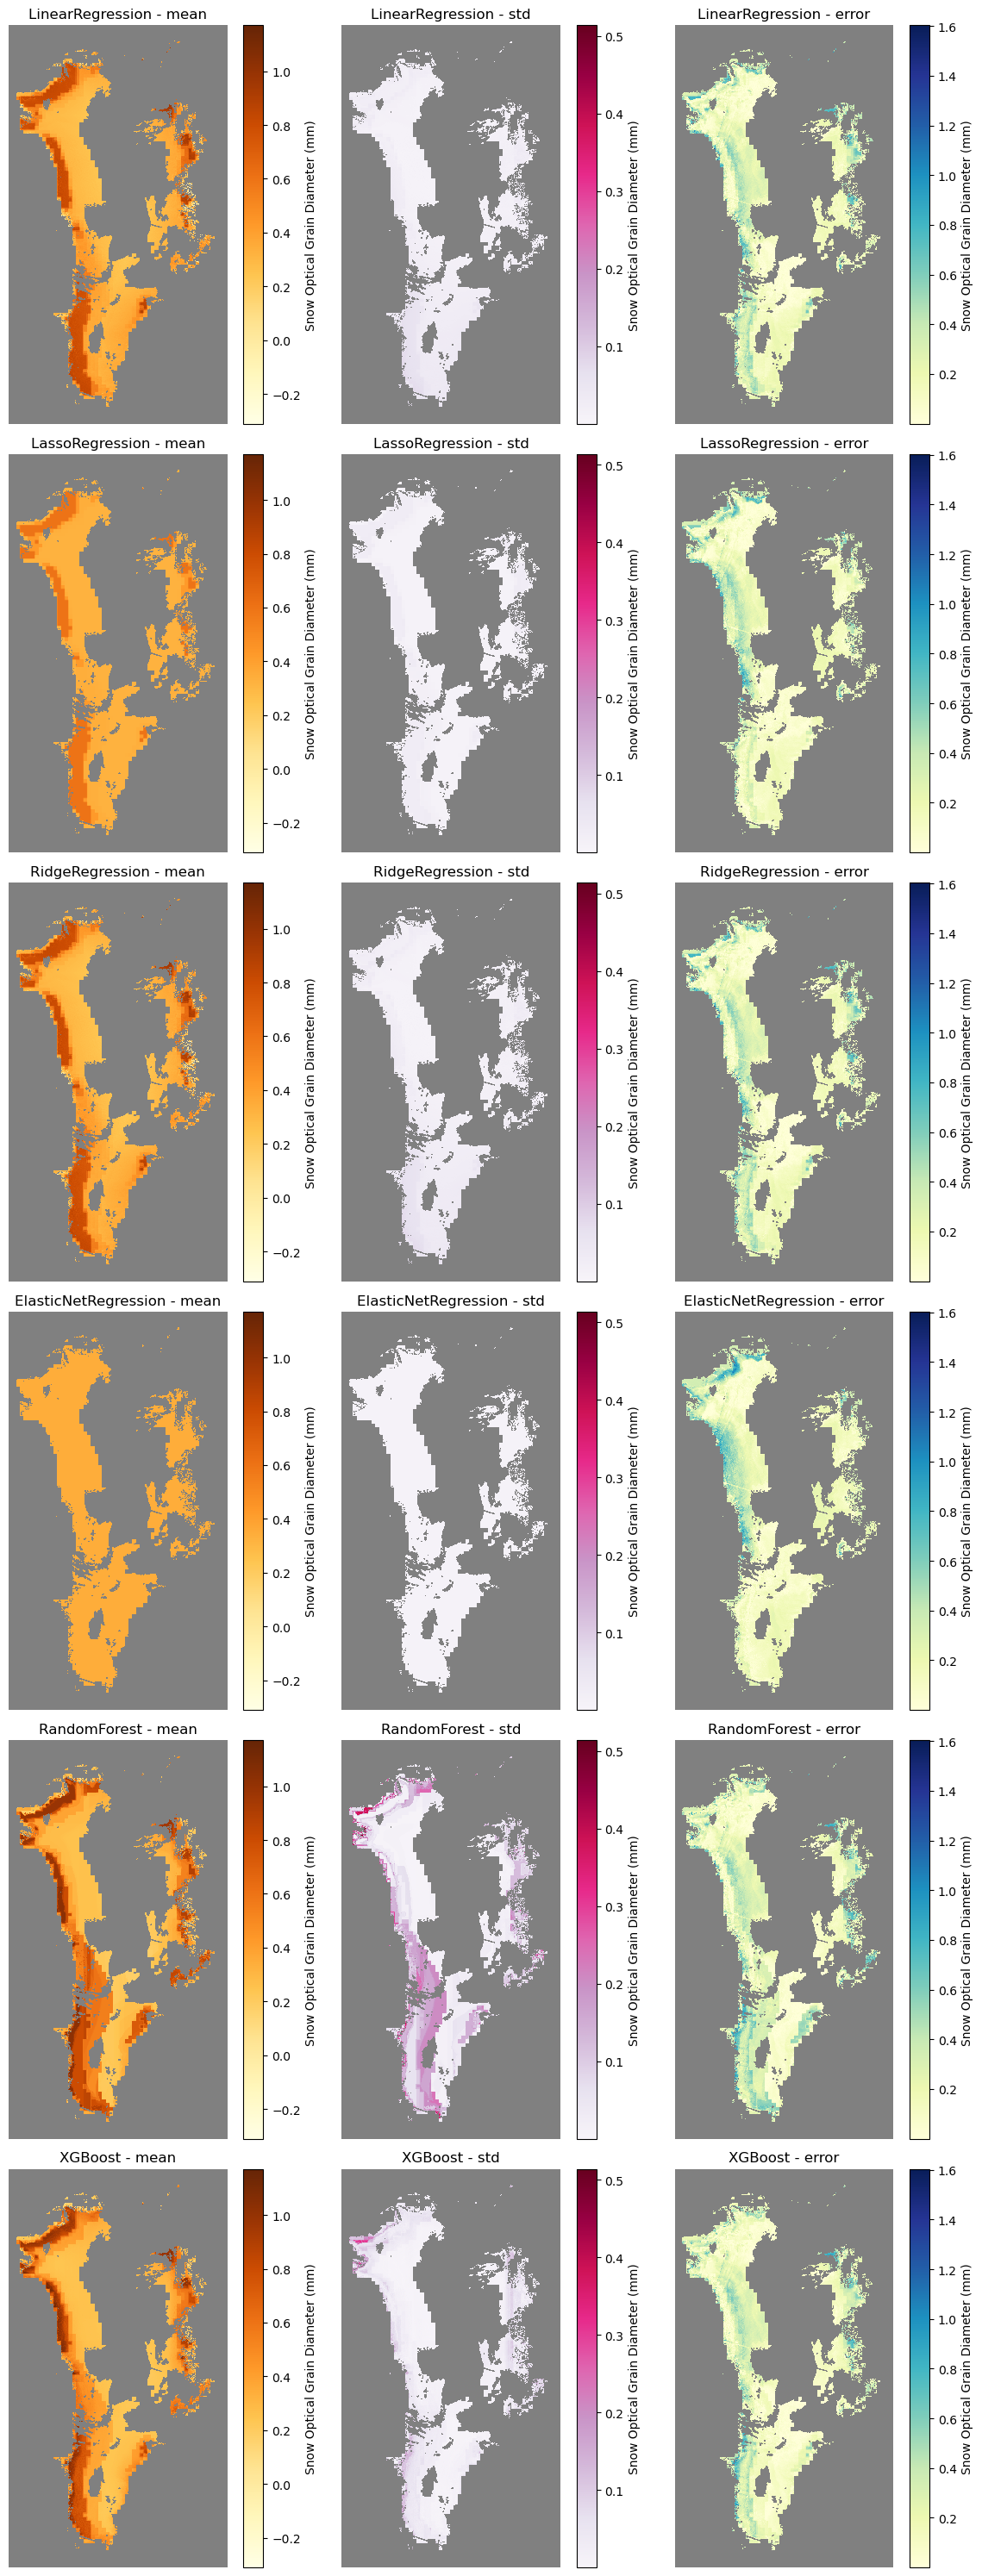

In [73]:
fig, axs = plt.subplots(nrows=6, ncols=3, sharex=True, figsize=(12, 5*6))

for idx1, model_name in enumerate(["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]):
    for idx2, metric in enumerate(["mean", "std", "error"]):

        data_tif = xr.open_dataarray(f"../Data/results/{model_name}_2019-08-14_{metric}.tif")

        if metric == "mean":
            cmap = YlOrBr
            cmap.set_bad('gray',1.)
            data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, ax=axs[idx1, idx2], vmin=-0.30933694, vmax=1.1704209)
        elif metric == "std":
            cmap = PuRd
            cmap.set_bad('gray',1.)
            data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, ax=axs[idx1, idx2], vmin=0.00053095, vmax=0.5135851)
        else:
            cmap = YlGnBu
            cmap.set_bad('gray',1.)
            data_tif.plot(cmap=cmap, cbar_kwargs=cbar_kwargs, ax=axs[idx1, idx2], vmin=0.0000000022, vmax=1.6034958)


        axs[idx1, idx2].set_aspect("equal")
        axs[idx1, idx2].get_xaxis().set_visible(False)
        axs[idx1, idx2].get_yaxis().set_visible(False)
        axs[idx1, idx2].set_title(f"{model_name} - {metric}")
        axs[idx1, idx2].axis('off')

plt.tight_layout()
plt.show()

C:\Users\ninaz\AppData\Local\Temp\ipykernel_3612\48974351.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=band_data, ax=axs[idx1])


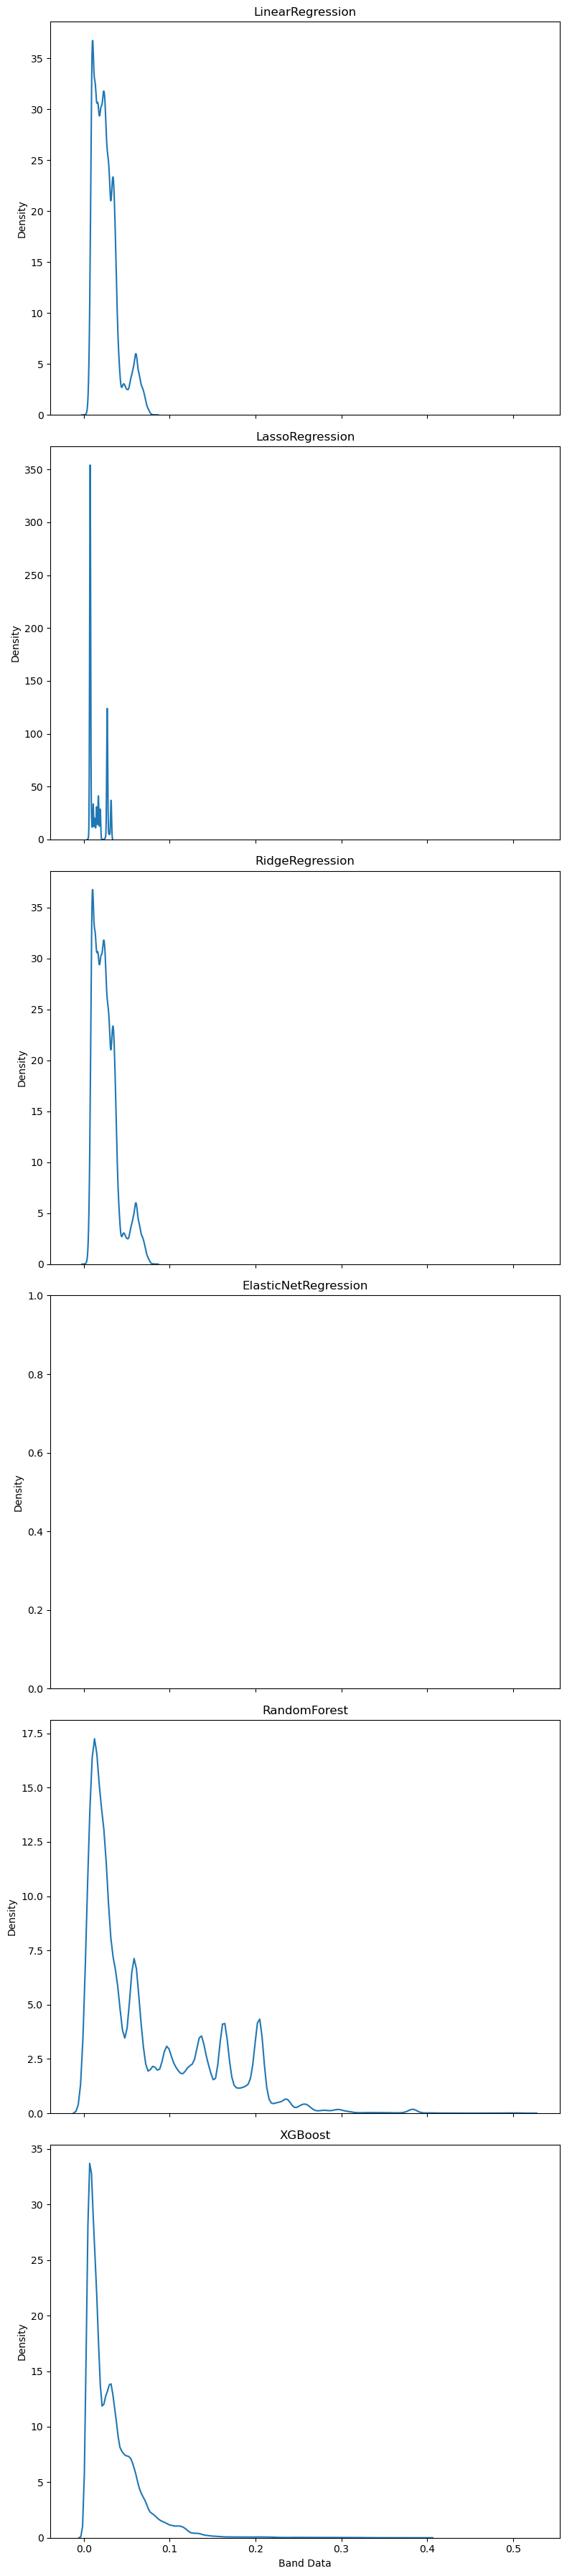

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr

model_names = ["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]

fig, axs = plt.subplots(nrows=len(model_names), ncols=1, figsize=(8, 6*len(model_names)), sharex=True)

for idx1, model_name in enumerate(model_names):
    data_tif = xr.open_dataarray(f"../Data/results/{model_name}_2019-08-14_std.tif")
    band_data = data_tif.values.flatten()  # Flatten the array

    sns.kdeplot(data=band_data, ax=axs[idx1])
    axs[idx1].set_ylabel("Density")
    axs[idx1].set_title(model_name)
    # show x-ticks
    axs[idx1].get_xaxis().set_visible(True)
    # fill the density plot
    axs[idx1].fill_between(band_data, 0, 1, alpha=0.2)

plt.xlabel("Band Data")
plt.tight_layout()
plt.show()
